`fairness` detect bias on binary classification (adult dataset)
----

### Load packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from transparentai.datasets import load_adult
from transparentai import fairness

### Load data & prepare data

In [5]:
data = load_adult()
X, Y = data.drop(columns='income'), data['income']

In [6]:
X = X.select_dtypes('number')
Y = Y.replace({'>50K':1, '<=50K':0})

Split train test

In [7]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train classifier

In [8]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Prepare param

In [9]:
y_true       = Y_train
y_true_valid = Y_valid
y_pred       = clf.predict_proba(X_train)
y_pred_valid = clf.predict_proba(X_valid)

### Use `fairness.model_bias` function

In [11]:
privileged_group = {
    'gender':['Male'],                
    'marital-status': lambda x: 'Married' in x,
    'race':['White']
}

df_valid = data.loc[X_valid.index,:]
df_train = data.loc[X_train.index,:]

In [12]:
res_train = fairness.model_bias(y_true, y_pred, 
                                df_train, privileged_group)

In [13]:
res_valid = fairness.model_bias(y_true_valid, y_pred_valid, 
                                df_valid, privileged_group)

In [16]:
res_train['gender']

{'statistical_parity_difference': -0.13231605822839598,
 'disparate_impact': 0.33962945567610825,
 'equal_opportunity_difference': -0.040610318671651435,
 'average_odds_difference': -0.020305159335825718}

In [17]:
res_valid['gender']

{'statistical_parity_difference': -0.07115634875155499,
 'disparate_impact': 0.4125527391236129,
 'equal_opportunity_difference': -0.04035190564375013,
 'average_odds_difference': -0.021518912378814814}

### Use `fairness.model_bias` function with text

In [19]:
res_valid = fairness.model_bias(y_true_valid, y_pred_valid, 
                                df_valid, privileged_group,
                                returns_text=True)

In [20]:
print(res_valid['gender'])

The privileged group is predicted with the positive output 7.12% more often than the unprivileged group. This is considered to be fair.
The privileged group is predicted with the positive output 2.42 times more often than the unprivileged group. This is considered to be not fair.
For a person in the privileged group, the model predict a correct positive output 4.04% more often than a person in the unprivileged group. This is considered to be fair.
For a person in the privileged group, the model predict a correct positive output or a correct negative output 2.15% more often than a person in the unprivileged group. This is considered to be fair.
The model has 3 fair metrics over 4 (75%).


### Use `fairness.plot_bias` function

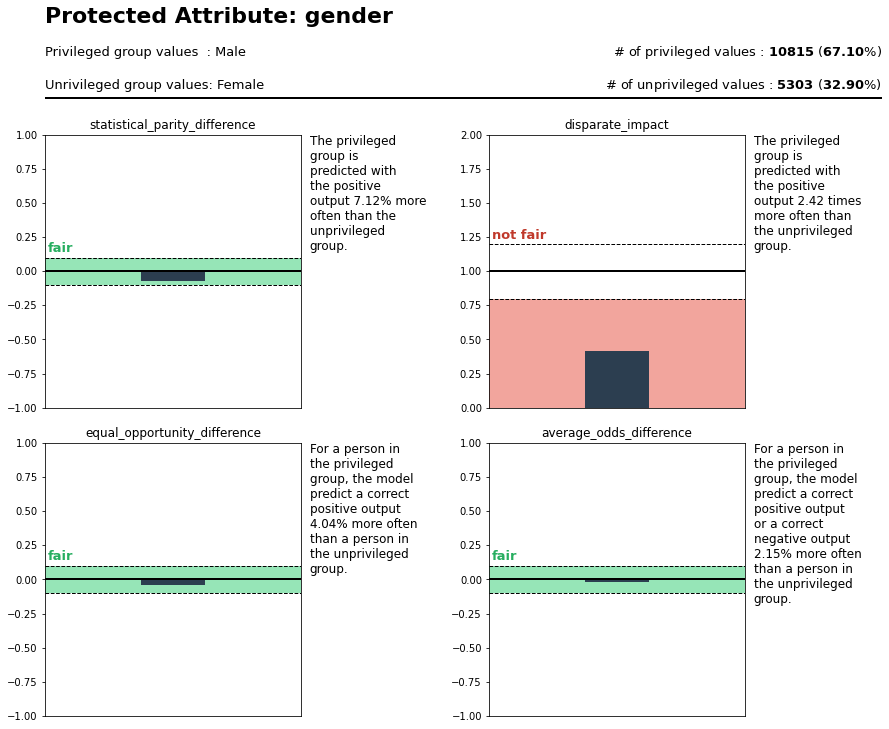

In [22]:
privileged_group = {'gender': ['Male']}

fairness.plot_bias(y_true_valid, y_pred_valid, 
                    df_valid, privileged_group)

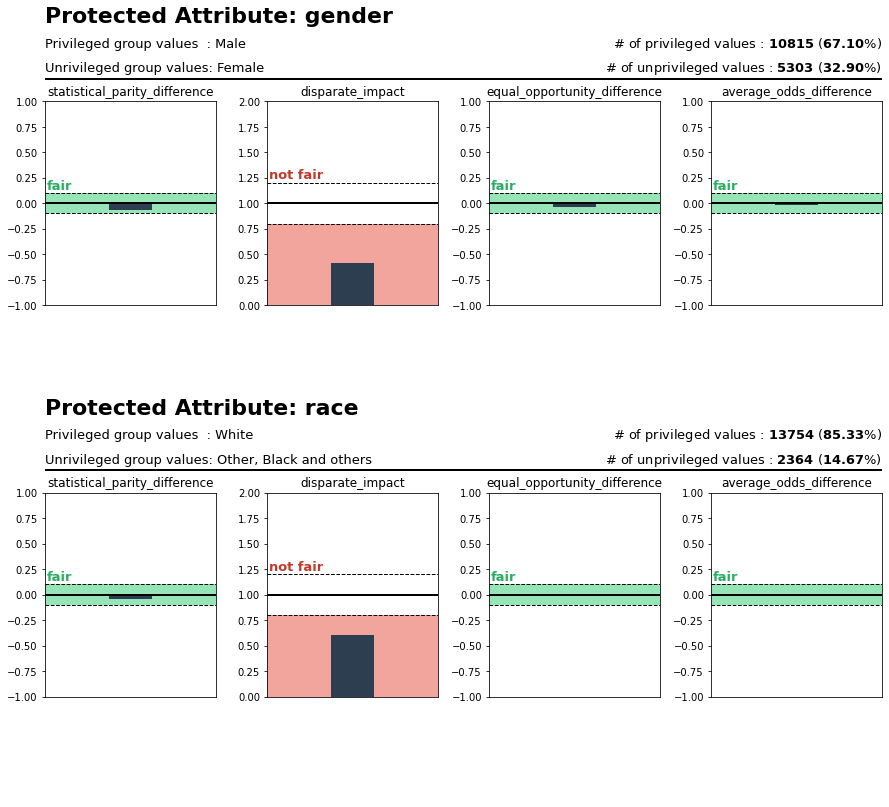

In [23]:
privileged_group = {
    'gender': ['Male'],
    'race': ['White']
}

fairness.plot_bias(y_true_valid, y_pred_valid, 
                    df_valid, privileged_group, with_text=False)

### Use `fairness.find_correlated_feature` function

In [25]:
privileged_group = {
    'gender':['Male'],                
    'marital-status': lambda x: 'Married' in x,
    'race':['White']
}

In [26]:
fairness.find_correlated_feature(data, privileged_group, 
                                 corr_threshold=0.4)

{'gender': {'marital-status': 0.4593,
  'occupation': 0.4239,
  'relationship': 0.6465},
 'marital-status': {'relationship': 0.4881,
  'gender': 0.4593,
  'income': 0.4482},
 'race': {'native-country': 0.4006}}